# Data Wrangling: Running Results

Analyze results of [https://valentinslauf.de/Ergebnisse-Fotos/](https://valentinslauf.de/Ergebnisse-Fotos/) 

## Get Data -> Clean Data -> Explore -> Statistics -> ML

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [69]:
df = pd.read_csv(
    "../../data/results_10km.csv",
    encoding="iso8859-1",
    skiprows=2,
    sep=";",
    index_col=0
)
df

,Stnr,Paarname,TN1,TN2,Ak,Platz AK,Endzeit,Rückstand
Gesamt,,,,,,,,
1,86.0,Je t'aime,Eric,Steven,Herren,1.0,0:34:32,NaN
2,36.0,Kaffeeklatsch,Karen,Patrick,mixed,1.0,0:40:58,0:06:26
3,63.0,Stralau Runners,Jonathan,Mark,Herren,2.0,0:41:26,0:06:54
4,5.0,Spuartzgis,Ryan,Timothy,mixed,2.0,0:42:21,0:07:49
5,117.0,Doodle Runners,Anthony,Vanessa,mixed,3.0,0:42:31,0:07:59
...,...,...,...,...,...,...,...,...
115,108.0,Long Distance Lovers,Raymond,Brent,Damen,14.0,1:27:16,0:52:44
116,41.0,Loveparade,Johnny,Kenneth,mixed,86.0,1:36:03,1:01:31
117,145.0,The snookies,Melissa,Trevor,mixed,87.0,1:43:53,1:09:21


## Anonymize the data

The data contains personal information as defined by the GDPR. All participants have agreed that their data is to be shared. This however does not include redistribution by third parties. Therefore, the data must be anonymized.

In [70]:
from faker import Faker

f = Faker()

In [71]:
def anonymize(s):
    if type(s) == str and s not in ["", "MCL", "NaN", "Kristian"]:
        return f.first_name()
    return s

df["TN1"].apply(anonymize)

Gesamt
1                                                                                Tonya
2                                                                                Julie
3                                                                              Jessica
4                                                                              Brendan
5                                                                              Shannon
                                                                                ...   
115                                                                                Ann
116                                                                            Breanna
117                                                                               Cody
DISQ                                                                               MCL
Zeitnahme & Auswertung durch Berlin-Timing - Internet: www.Berlin-Timing.de        NaN
Name: TN1, Length: 119, dtype: objec

## What is Tidy Data?

According to [Tidy Data](https://vita.had.co.nz/papers/tidy-data.pdf) by Hadley Wickham (2014), in tidy data:

1. Each variable forms a column.
2. Each observation forms a row.
3. Each type of observational unit forms a table.

(Codds 3rd normal form)


## Tidy Data Checklist

Don'ts:

* Column headers are values, not variable names.
* Multiple variables are stored in one column.
* Variables are stored in both rows and columns.
* Multiple types of observational units are stored in the same table.
* A single observational unit is stored in multiple tables.


## Useful phrases to inspect data

In [72]:
#remove NaN
df = df[df["Endzeit"].notnull()]

# Convert start time from string to datetime
df["Endzeit"] = df["Endzeit"].apply(
    lambda time: pd.to_timedelta(time)
)
df

/var/folders/lq/280gf8ld14v161g6ngpdjjnc0000gn/T/ipykernel_48444/593808631.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Endzeit"] = df["Endzeit"].apply(


,Stnr,Paarname,TN1,TN2,Ak,Platz AK,Endzeit,Rückstand
Gesamt,,,,,,,,
1,86.0,Je t'aime,Eric,Steven,Herren,1.0,0 days 00:34:32,NaN
2,36.0,Kaffeeklatsch,Karen,Patrick,mixed,1.0,0 days 00:40:58,0:06:26
3,63.0,Stralau Runners,Jonathan,Mark,Herren,2.0,0 days 00:41:26,0:06:54
4,5.0,Spuartzgis,Ryan,Timothy,mixed,2.0,0 days 00:42:21,0:07:49
5,117.0,Doodle Runners,Anthony,Vanessa,mixed,3.0,0 days 00:42:31,0:07:59
...,...,...,...,...,...,...,...,...
114,69.0,Forever Friends,Cindy,Grace,Damen,13.0,0 days 01:24:59,0:50:27
115,108.0,Long Distance Lovers,Raymond,Brent,Damen,14.0,0 days 01:27:16,0:52:44
116,41.0,Loveparade,Johnny,Kenneth,mixed,86.0,0 days 01:36:03,1:01:31


<Axes: ylabel='Frequency'>

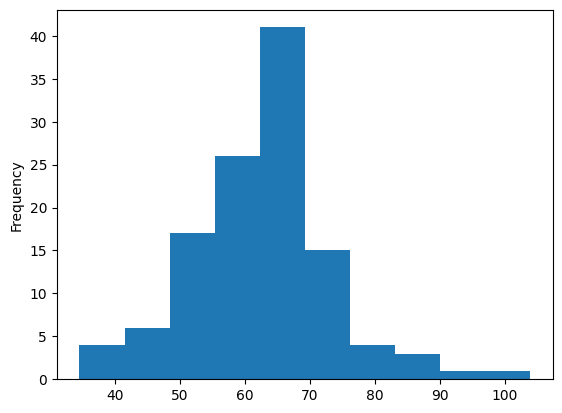

In [73]:
(df["Endzeit"].astype(int) / (60 * 1000000000)).plot.hist(bins=10)

<Axes: >

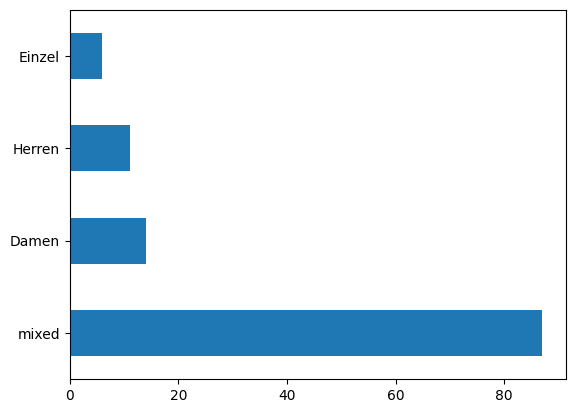

In [74]:
# Replace Values

df["Ak"].value_counts().plot.barh()

/var/folders/lq/280gf8ld14v161g6ngpdjjnc0000gn/T/ipykernel_48444/3673495846.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Ak"].replace({


<Axes: >

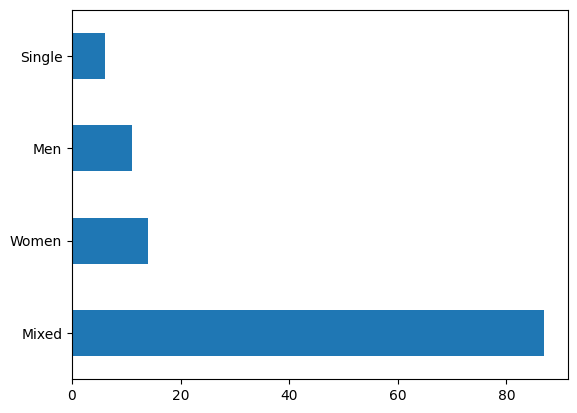

In [75]:
# German categories & not all are capital

# Could do this
# df[df["Ak"] == "Herren"]["Ak"] = "Men"

df["Ak"].replace({
    "Herren": "Men", 
    "Damen": "Women",
    "mixed": "Mixed",
    "Einzel": "Single"
    }, inplace=True)
# Could do another replace on this to replace Damen as well but you can also just add a python dict in the replace to replace multiple together

df["Ak"].value_counts().plot.barh()



## What to put in the index of a DataFrame?

In [76]:
df.head()
# multi index, replace index, set index

,Stnr,Paarname,TN1,TN2,Ak,Platz AK,Endzeit,Rückstand
Gesamt,,,,,,,,
1,86.0,Je t'aime,Eric,Steven,Men,1.0,0 days 00:34:32,NaN
2,36.0,Kaffeeklatsch,Karen,Patrick,Mixed,1.0,0 days 00:40:58,0:06:26
3,63.0,Stralau Runners,Jonathan,Mark,Men,2.0,0 days 00:41:26,0:06:54
4,5.0,Spuartzgis,Ryan,Timothy,Mixed,2.0,0 days 00:42:21,0:07:49
5,117.0,Doodle Runners,Anthony,Vanessa,Mixed,3.0,0 days 00:42:31,0:07:59


## Methods to fill missing values

<Axes: >

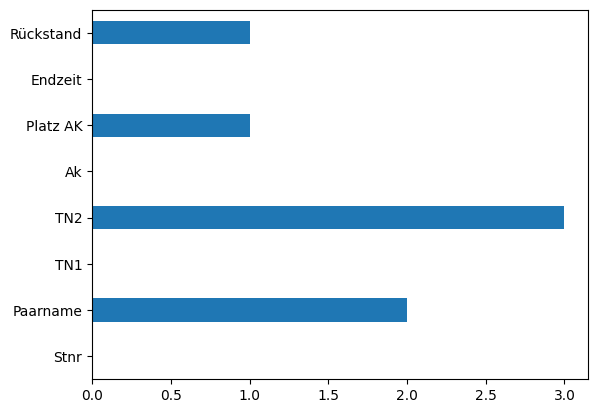

In [79]:
# Start with this, shows you where all the missing data is

df.isna().sum().plot.barh()

In [82]:
df["TN2"].fillna("Unknown", inplace=True)
df["Paarname"].fillna("Unknown", inplace=True)
df["Rückstand"].fillna("00:00:00", inplace=True)
df.head()

/var/folders/lq/280gf8ld14v161g6ngpdjjnc0000gn/T/ipykernel_48444/3311399941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TN2"].fillna("Unknown", inplace=True)
/var/folders/lq/280gf8ld14v161g6ngpdjjnc0000gn/T/ipykernel_48444/3311399941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Paarname"].fillna("Unknown", inplace=True)
/var/folders/lq/280gf8ld14v161g6ngpdjjnc0000gn/T/ipykernel_48444/3311399941.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

,Stnr,Paarname,TN1,TN2,Ak,Platz AK,Endzeit,Rückstand
Gesamt,,,,,,,,
1,86.0,Je t'aime,Eric,Steven,Men,1.0,0 days 00:34:32,00:00:00
2,36.0,Kaffeeklatsch,Karen,Patrick,Mixed,1.0,0 days 00:40:58,0:06:26
3,63.0,Stralau Runners,Jonathan,Mark,Men,2.0,0 days 00:41:26,0:06:54
4,5.0,Spuartzgis,Ryan,Timothy,Mixed,2.0,0 days 00:42:21,0:07:49
5,117.0,Doodle Runners,Anthony,Vanessa,Mixed,3.0,0 days 00:42:31,0:07:59


In [85]:
# Problems with filling missing values
df["Mins"] = df["Endzeit"].astype(int) / (60 * 1000000000)
df.loc[["1", "3", "5"], "Mins"] = np.NaN
df.head()

/var/folders/lq/280gf8ld14v161g6ngpdjjnc0000gn/T/ipykernel_48444/4149049747.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Mins"] = df["Endzeit"].astype(int) / (60 * 1000000000)


,Stnr,Paarname,TN1,TN2,Ak,Platz AK,Endzeit,Rückstand,Mins
Gesamt,,,,,,,,,
1,86.0,Je t'aime,Eric,Steven,Men,1.0,0 days 00:34:32,00:00:00,NaN
2,36.0,Kaffeeklatsch,Karen,Patrick,Mixed,1.0,0 days 00:40:58,0:06:26,40.966667
3,63.0,Stralau Runners,Jonathan,Mark,Men,2.0,0 days 00:41:26,0:06:54,NaN
4,5.0,Spuartzgis,Ryan,Timothy,Mixed,2.0,0 days 00:42:21,0:07:49,42.350000
5,117.0,Doodle Runners,Anthony,Vanessa,Mixed,3.0,0 days 00:42:31,0:07:59,NaN


<Axes: xlabel='Gesamt'>

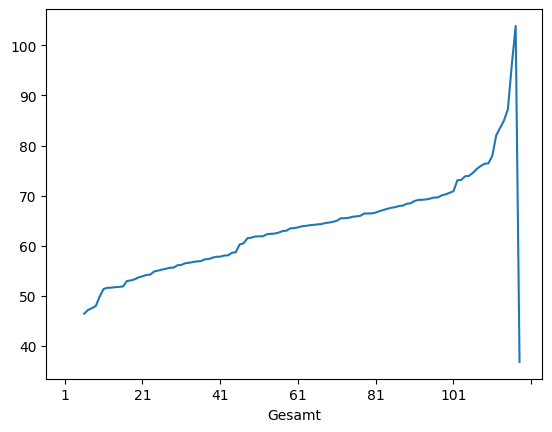

In [88]:
df["Mins"].plot()

In [ ]:
df["Mins"].fillna(0, inplace=True)
df["Mins"].plot()